# Primer Modelo de ML: Árboles de decisión

En este notebook comenzamos a trabajar en los problemas de Clasificación, una de las tareas más importantes dentro de Machine Learning (dentro, a su vez, de lo que llamamos Aprendizaje Supervisado). Clasificación en Machine Learning consiste en aprender etiquetas discretas "y" a partir de un conjunto de features "X" (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias.

En este notebook trabajaremos con uno de los modelos fundamentales de Machine Learning: Árboles de Decisión. Para ello, usaremos el dataset de Titanic y la librería Scikit-Learn. Debido a la implementación orientada a objetos de Scikit-Learn, **todos los modelos se entrenan y se usan de la misma forma**.

Recuerda que todas las librerías fueron desarrolladas por personas, que en búsqueda de resolver una necesidad de cómputo, escribieron el código que hoy podemos reutilizar para poder poner directamente manos a la obra en lugar de tener que desarrollarlo y optimizarlo una y otra vez. Sin embargo, la idea que quiero transmitirte es que puedes hacer el intento de escribir tú mismo las funciones y clases que importaremos de las librerías. Si bien no es lo habitual y desde luego consumirá mucho más tiempo, este trabajo te permitirá comprender nuevos detalles acerca de lo que estás haciendo. 

El dataset de Titanic es famoso entre los estudiantes de Data Science. El mismo ha surgido de una competencia en el sitio Kaggle: [Machine Learning from Disaster](https://www.kaggle.com/c/titanic). Veremos una implementación muy sencilla acerca de un posible abordaje para resolverlo, partiendo también de una versión simplificada y filtrada del dataset original de dicha competencia.

Nuestro Dataset está compuesto por una serie de columnas, que tienen los siguientes significados:

1.   **Sobreviviente**: `0` = No; `1` = Si
2.   **Clase**: `1` = Primera Clase; `2` = Segunda Clase; `3` = Tercera Clase
3.   **Género**: `0` = Hombre; `1` = Mujer
4.   **Edad**: edad en años
5.   **HermEsp**: cantidad de hermanos o esposos a bordo del Titanic, para el pasajero en cuestión
6.   **PadHij**: cantidad de padres o hijos a bordo del Titanic, para el pasajero en cuestión

**Ejercicio:** Carga el dataset de Titanic y tomate un rato para estudiar sus características. 

In [2]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import tree

In [3]:
# Vincular disco
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# leer archivo csv "/content/drive/MyDrive/Colab Notebooks/DataSet_Titanic.csv"
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet_Titanic.csv")

In [6]:
# visualizar las primeras 5 filas
df.head()


,Sobreviviente,Clase,Genero,Edad,HermEsp,PadHij
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


Árbol de decisión: como primera aproximación, diremos que es un objeto que, dadas varias instancias con un determinado grupo de features `X` y unas determinadas etiquetas objetivo `y`, el árbol de desición aprende automáticamente reglas (de mayor a menor importancia) sobre cada feature de manera de poder decidir qué etiqueta le corresponde a cada instancia.

Vamos a separar el dataset de Titanic en una variable `X` los atributos que usarás para predecir, y en una variable `y` la etiqueta que quieres predecir. En este caso, si sobrevivió o no.

In [7]:
# guardar en variable X los atributos predictores (todas las cametiquetas excepto "Sobreviviente")
X = df.drop('Sobreviviente', axis=1)

# guardar en y la etiqueta a predecir ("Sobreviviente")
y = df.Sobreviviente

In [9]:
# visualizar x
X.head()


,Clase,Genero,Edad,HermEsp,PadHij
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [10]:
# visualizar y
y.head()


0    0
1    1
2    1
3    1
4    0
Name: Sobreviviente, dtype: int64

Si queremos entrenar un árbol de decisión para clasificar nuestras instancias, primero debemos crear un objeto correspondiente al modelo. Este objeto será de de la clase DecisionTreeClassifier, la cual importamos desde la librería Scikit-Learn. 

In [11]:
# Creamos un objeto arbol
arbol = DecisionTreeClassifier(max_depth=2, random_state=42)



Hasta ahora, lo único que hicimos fue crear el objeto, nada más.

Una vez que nuestro modelo fue creado, precisamos entrenarlo sobre nuestros datos. Esto lo logramos con el método **fit(...)** que poseen ***todas*** las clases correspondientes a modelos de Scikit-Learn.

In [12]:
# entrenamos a la máquina
arbol.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

¿Qué ocurrió?

El modelo ya está entrenado. Esto significa que contamos con una herramienta que, dadas ciertas características de una instancia, nos devuelve qué etiqueta `y` que el modelo cree que le corresponde. Esto lo podemos hacer utilizando el método **predict(...)**, que también poseen ***todas*** las clases correspondientes a modelos de **Scikit-Learn**.

Nos podríamos preguntar luego: ¿cuál es el porcentaje de instancias bien clasificadas por el modelo? Para responder esto usaremos nuevamente el método **predict** sobre todo el dataset `X`. Luego con la función `accuracy_score` podemos calcular el porcentaje de aciertos que obtenemos al comparar nuestra predicción `y_pred` contra la clase original `y`. Recomendamos mirar la documentación de esta función, por ahora simplemente diremos que es una de las tantas métricas que utilizamos para evaluar nuestros modelos, y lo que hace es devolvernos un porcentaje de aciertos.

In [13]:
# Predecimos sobre nuestro set
pred_y = arbol.predict(X)

# Comaparamos con las etiquetas reales
print('Precision: ', accuracy_score(pred_y, y))

Precision:  0.8025210084033614


Esto quiere decir que el clasificador asigna la etiqueta correcta en el 80,25% de los casos.

Otra forma de ver los resultados de nuestro clasificador es la matriz de confusión. La matriz de confusión es una tabla de doble entrada, donde un eje corresponde a la etiqueta real (y) y otro a la etiqueta predicha(pred_y). En la diagonal encontramos los aciertos, mientras que por fuera de la diagonal aquellas instancias mal clasificadas. Nuevamente, recomendamos ver la documentación.

In [15]:
# creamos una matriz de confusión
confusion_matrix(y, pred_y)


array([[407,  17],
       [124, 166]])

Una forma más interesante de ver esta información es con la función plot_confusion_matrix:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


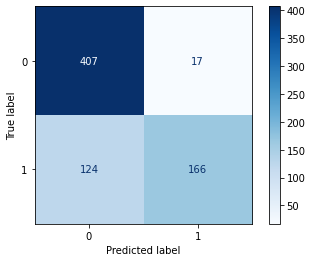

In [16]:
# creamos un gráfico para la matriz de confusión
plot_confusion_matrix(arbol, X, y, cmap=plt.cm.Blues, values_format='.0f')


O podemos obtener una versión normalizada (con valores entre 0 y 1, o dicho de otra manera, el porcentaje):

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


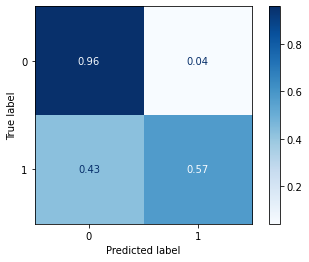

In [18]:
# creamos un gráfico para la matriz de confusión normalizada
plot_confusion_matrix(arbol, X, y, cmap=plt.cm.Blues, values_format='.2f', normalize='true')

Podemos mostrar gráficamente el árbol de decisión que fue generado automáticamente al entrenar el modelo, para obtener un mayor conocimiento de nuestros datos y del funcionamiento del modelo. Las variables más importantes (aquellas que fueron de mayor utilidad para clasificar las diferentes instancias del dataset), aparecen en la parte superior, y en función de los valores asumidos, cada instancia será clasificada en diferentes ramas, tras lo cual el árbol se hace nuevamente una pregunta basada en los valores que asume esta instancia de una característica determinada.

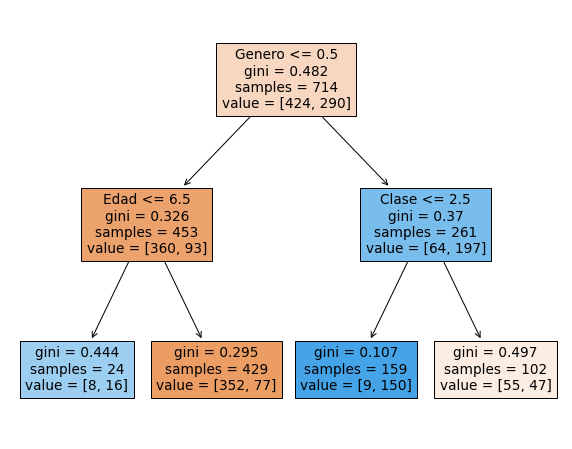

In [19]:
# mostramos un árbol gráficamente
plt.figure(figsize=(10,8))
tree.plot_tree(arbol, filled=True, feature_names=X.columns)
plt.show()

La rama de la izquierda representa el resultado verdadero (True), mientras que la rama derecha, representa el resultado falso (False). Te doy otra pista para interpretar el modelo: el color de cada rectángulo representa la etiqueta predicha por el modelo (en nuestro caso, la etiqueta azul representa el "sobrevive", o un valor de y=1, y la naranja, "no sobrevive", o un valor de y=0). 

A su vez, la tonalidad representa la seguridad que tiene el modelo en su predicción. A partir del entrenamiento, el modelo aprendió algunas reglas para clasificar las instancias de acuerdo a los valores asumidos por ciertas características. Dicha clasificación, sin embargo, contiene errores, dado que esta división puede generar que una proporción (cuanto menor, mejor), de instancias sean incorrectamente clasificadas, ya que en la realidad pertenecen a la otra categoría. La cantidad de instancias incorrectamente clasficadas se procesa matemáticamente en un indicador conocido como "impureza de Gini", el cual mide la cantidad de instacias incorrectamente clasificadas dentro de cada "hoja" del árbol. Alcanza el valor mínimo de cero cuando no hay instancias incorrectamente clasificadas. Esta información existe en nuestro gráfico de árbol, y a su vez determina el color de la hoja, siendo más intenso cuando menor es el valor de la "impureza de Gini", significando que la clasificación de esa hoja es más robusta para predecir correctamente un resultado.

Podemos ver que nuestro modelo ha aprendido cosas muy interesantes:


*   La primera pregunta que se hace nuestro modelo, es acerca del sexo de la persona: si es hombre (0) a continuación se pregunta su edad. Si es un hombre de edad 7 años o más, le asigna una etiqueta de "no sobrevive". Por el contrario, si es un niño de 6 años o menos, predecirá "sobrevive"
*   El caso es diferente si como resultado de la primera pregunta, el valor de sexo fuera 1 (mujer). La pregunta que se hará a continuación el árbol es referido a qué clase pertenecía la pasajera: si fuera de 1° o 2° clase, le asignará la predicción "sobrevive", y si fuera de 3° clase, "no sobrevive".

Lamentablemente no es un acontecimiento feliz, y tenemos los datos que demuestran que han existido pérdidas humanas. El modelo no tiene prejuicios al respecto, pero ha aprendido automáticamente de los datos para explicar cómo se dieron los sucesos. Piensa en cómo esto se relaciona con los acontecimientos históricos ocurridos en ocasión del hundimiento del Titanic. ¿Te suena la frase *"Mujeres y niños primero"*, al momento de lanzarse a los botes salvavidas? El modelo ha detectado que las mujeres tuvieron mayores oportunidades de supervivencia (y cuanto más pudientes, mejores serían sus chances), y que en el caso de los hombres, los niños pequeños tuvieron más suerte que los adolescentes o adultos.

Otra visualización útil y más sintética que la anterior, es la posibilidad de graficar las importancias que han tenido cada una de las variables en la predicción obtenida. Esta importancia es dada por Scikit-Learn a cada feature (x) en función de qué tan útil ha sido para clasificar las instancias.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


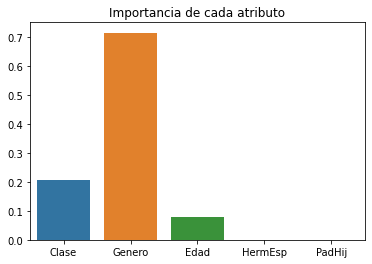

In [20]:
# graficamos las importancias en un gráfico de barras
# creamos las variables x (importancias) e y (columnas)
importancias = arbol.feature_importances_
columnas = X.columns

# creamos el gráfico
sns.barplot(columnas, importancias)
plt.title('Importancia de cada atributo')
plt.show()


Según el gráfico anterior, el factor más determinante fue el género, seguido de la clase del pasajero, y luego la edad. Complementado con el diagrama anterior, pudimos ver cómo las variables se influyeron mutuamente para determinar la posibilidad de supervivencia de acuerdo al género de la persona.

El siguiente paso en el proceso de un científico de datos, sería el de optimizar su modelo de machine learning, para tratar de alcanzar una mayor precisión. Ten en cuenta que llegar a un 100% de precisión (accuracy) no es por lo general realista en ningún proyecto real, pero un umbral aceptable suele encontrarse entre los 85% y 95%, dependiendo de la complejidad del dataset y de los modelos ya disponibles (un modelo más complejo valdrá la pena únicamente si obtiene mejores resultados que un modelo simple).

1. Experimenta con distintas profundidades y visualizar el árbol obtenidos con la función `plot_tree` del módulo `tree` de Scikit-Learn.
1. Evalúa su desempeño calculando la exactitud y viendo su matriz de confusión.
1. Observa la importancia asignada a cada atributo (`feature_importances_`). En la documentación encontrarás información que puede resultarte útil para mejorar los resultados obtenidos.


¿Te parece que lo obtenido concuerda con lo que esperabas?¿Qué más puedes aprender de la tragedia del Titanic viendo el árbol de decisíon y la importancia de cada atributo (feature)?